<a href="https://colab.research.google.com/github/nanda898/ImageClassificationDensenet/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt

# DenseNet model definition
def dense_net(input_shape, num_classes):
    def dense_block(x, num_layers, growth_rate):
        for _ in range(num_layers):
            y = layers.BatchNormalization()(x)
            y = layers.Activation('relu')(y)
            y = layers.Conv2D(growth_rate, 3, padding='same')(y)
            x = layers.Concatenate()([x, y])
        return x

    def transition_block(x):
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Conv2D(x.shape[-1] // 2, 1, padding='same')(x)
        # Check if height is odd
        if x.shape[1] % 2 == 1:
          x = layers.ZeroPadding2D(padding=((0, 1), (0, 1)))(x)
        x = layers.AveragePooling2D(2, strides=2)(x)
        return x

    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    num_layers = [6, 12, 24, 16]
    growth_rate = 32
    for num_layer in num_layers:
        x = dense_block(x, num_layer, growth_rate)
        x = transition_block(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, x)
    return model

In [ ]:
# HERE WE ARE LoadING THE  CIFAR-10 dataset AND WE ARE ASSIGINING THE DATASET TO TRAIN AND TEST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Select a subset of the dataset
subset_size = 1500
x_train = x_train[:subset_size]
y_train = y_train[:subset_size]

# Preprocess the dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Create and compile the DenseNet model
model = dense_net(input_shape=(32, 32, 3), num_classes=10)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.2236 - loss: 2.1805 - val_accuracy: 0.0999 - val_loss: 2.7393
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.3737 - loss: 1.7324 - val_accuracy: 0.1592 - val_loss: 2.3647
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.4315 - loss: 1.5364 - val_accuracy: 0.1159 - val_loss: 2.6677
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.4607 - loss: 1.4682 - val_accuracy: 0.1166 - val_loss: 3.0363
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.5268 - loss: 1.2388 - val_accuracy: 0.1069 - val_loss: 3.4552
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.5365 - loss: 1.2166 - val_accuracy: 0.1064 - val_loss: 3.8646
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.5966 - loss: 1.1056 - val_accuracy: 0.1418 - val_loss: 2.9099
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step

(-0.5, 31.5, 31.5, -0.5)

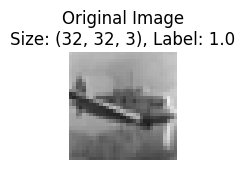

In [ ]:
# Choose a random image from the test set
import numpy as np
image_index = np.random.randint(0, 600)
test_image = x_test[image_index]
true_label = y_test[image_index][0]

# Display the original image and true label
plt.subplot(1, 4, 1)
plt.imshow(test_image)
plt.title(f"Original Image\nSize: {test_image.shape}, Label: {true_label}")
plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


(0.0, 1.0, 0.0, 1.0)

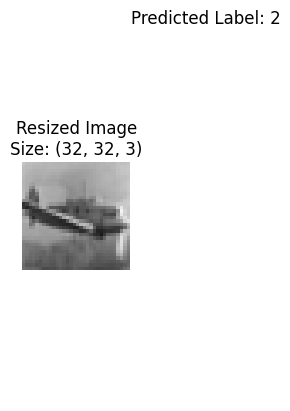

In [14]:

# Resize the image to match the model's input shape
resized_image = tf.image.resize(test_image, [32, 32])
resized_image = resized_image.numpy()

# Display the resized image
plt.subplot(1, 4, 2)
plt.imshow(resized_image, interpolation='nearest')
plt.title(f"Resized Image\nSize: {resized_image.shape}")
plt.axis('off')
# Make predictions on the resized image
predictions = model.predict(tf.expand_dims(resized_image, axis=0))
predicted_label = tf.argmax(predictions[0]).numpy()

# Display the predicted label
plt.subplot(1, 4, 3)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')


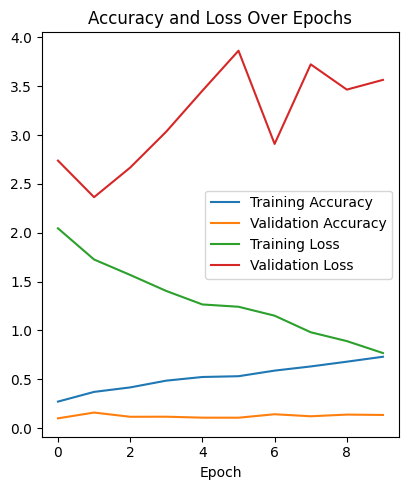

In [13]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(16, 5))
plt.subplot(1, 4, 4)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Accuracy and Loss Over Epochs')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()